<a href="https://colab.research.google.com/github/JSJeong-me/JBNU-2021/blob/main/Predictive_Analytics/kc3_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
# load the car sales dataset
#from pandas import read_csv
import pandas as pd
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)

df=pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(32255, 1)
                     Value
TS                        
2019-10-01 00:15:00  830.4
2019-10-01 00:30:00  821.7
2019-10-01 00:45:00  821.1
2019-10-01 01:00:00  825.0
2019-10-01 01:15:00  819.0


In [ ]:
print(df.tail())

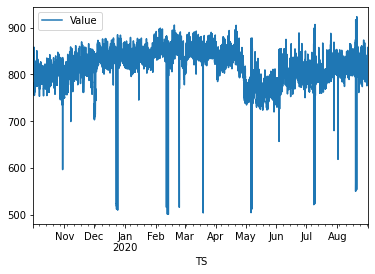

In [ ]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [ ]:
'''
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()
'''

In [ ]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.head()

In [ ]:
df_day.tail()

,ds,y
8059,2020-08-31 19:00:00,3306.9
8060,2020-08-31 20:00:00,3237.6
8061,2020-08-31 21:00:00,3195.9
8062,2020-08-31 22:00:00,3160.2
8063,2020-08-31 23:00:00,3156.9


In [ ]:
df_day.describe()

In [ ]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.tail(10)

,ds,y
326,2020-08-22,77932.2
327,2020-08-23,76946.4
328,2020-08-24,78667.5
329,2020-08-25,77802.3
330,2020-08-26,77648.1
331,2020-08-27,79910.1
332,2020-08-28,78551.1
333,2020-08-29,78011.7
334,2020-08-30,77128.5
335,2020-08-31,77797.2


In [ ]:
from fbprophet import Prophet
from pandas import to_datetime

In [ ]:
'''
# fit prophet model on the car sales dataset
from pandas import read_csv

from fbprophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
'''
# prepare expected column names
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])
# define the model
model = Prophet()

In [ ]:
# fit the model
model.fit(df_day)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
      99       270.121    0.00413718       75.7289           1           1      120
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     179       270.265    0.00019681       84.1622   2.169e-06       0.001      273  LS failed, Hessian reset
     199       270.283   1.38947e-05       87.8642      0.3402           1      299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     240       270.296    1.6343e-05       89.9117   1.953e-07       0.001      381  LS failed, Hessian reset
     299         270.3   4.73573e-08       74.9719      0.3914           1      455
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     300         270.3   8.25604e-09       74.4478      0.3522      0.3522      456
Optimization terminated normally:
  Convergence detected: absolute parameter change was below tolerance

In [ ]:
'''# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
'''
# define the period for which we want a prediction


In [ ]:
from pandas import DataFrame

future = list()

In [ ]:
for i in range(1, 7):
	date = '2020-09-%02d' % i
	future.append([date])

In [ ]:
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)

          ds          yhat    yhat_lower    yhat_upper
0 2020-09-01  79099.474160  77364.475573  80934.907789
1 2020-09-02  79213.062757  77315.913277  81054.258323
2 2020-09-03  79200.906666  77308.362910  80909.267197
3 2020-09-04  79175.813901  77334.492487  80929.686214
4 2020-09-05  79110.802639  77374.122996  80897.030794


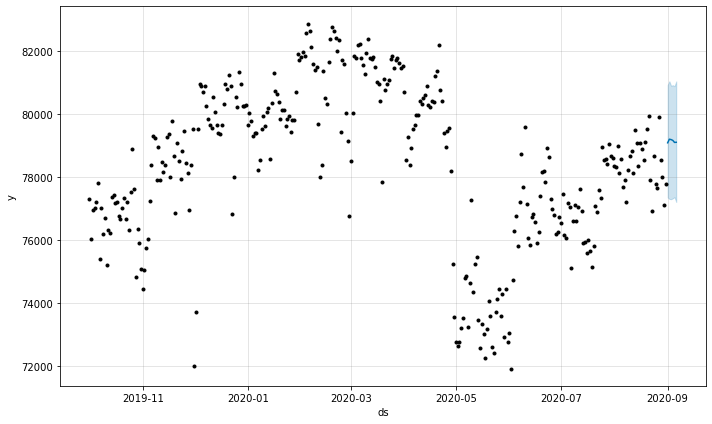

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
'''
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()
'''

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        y
324 2020-08-20  79549.5
325 2020-08-21  79953.0
326 2020-08-22  77932.2
327 2020-08-23  76946.4
328 2020-08-24  78667.5
MAE: 1940.026


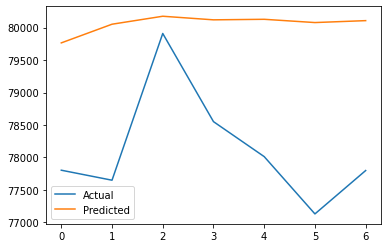

In [ ]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)
# prepare expected column names
#df.columns = ['ds', 'y']
#df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df_day.drop(df_day.index[-7:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(14, 21):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_day['y'][-7:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
future

In [ ]:
y_true

In [ ]:
forecast.yhat

In [ ]:
forecast